####  Unitary Matrices
Unitary matrices have the property,
$$
UU^\dagger = U^\dagger U = I
$$
In other words, the transpose is the inverse.

####  Diagonal Matrices

$$
\begin{pmatrix}
a & 0 & 0 \\
0 & b & 0 \\
0 & 0 & c
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\
y_2 \\
y_3
\end{pmatrix}
$$
The variables are decopled, s0 the invese is
$$
\begin{pmatrix}
a^{-1} & 0 & 0 \\
0 & b^{-1} & 0 \\
0 & 0 & c^{-1}
\end{pmatrix}
$$


In [36]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

##  Singular Value Decomposition

Any matrix $A$ can be writen as the product of three matrices,
$$A = U\Sigma V^\dagger$$
where $U$ and $V$ are unitary matrices and $\Sigma$ is a diagonal matrix.

We are interested in solving the system,
$$Ax = b$$
Where $A$ is a square matrix.

We can rewrite this as,
$$U\Sigma V^\dagger x = b$$

Solving this is simple since $U$ and $V$ are unitary, and $\Sigma$ is diagonal.

$$x = V \Sigma^{-1} U^\dagger b$$

As an example.

In [53]:
np.random.seed(2)

#  Generate a square matrix
A = np.random.normal( size=(3, 3))

#  Make a vector of known values
b = np.array([1,2,3])

#  Calculate the SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

#  Solve the system
x = Vt.T @ np.diag(1/S, 0) @ U.T @ b
print(x)

#  Let's compare this with the results we get from the canned routine in Numpy
#  This uses an LU decomposition
print( np.linalg.solve(A, b))

[-2.6384236  -3.59459038  0.14129786]
[-2.6384236  -3.59459038  0.14129786]


##  Overdetermined Systems

What happens if we use the SVD to "solve" an overdetermined system?

Let's look at how such a system might arise, linear regression.

In [54]:
#  Generate some data
np.random.seed(23)
x = np.array([0, 2, 4, 6, 8, 10])
y = -0.75 * x + 1 + np.random.normal( size=x.shape )

Let's plt the data, and do a linear regression

Slope =  -0.8190931246410348
Intercept =  1.4311999194490517


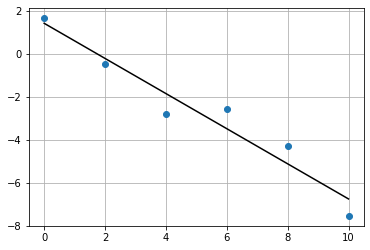

In [52]:
#  Plot the data
plt.plot(x, y, 'o')
plt.grid(True)

#  Do the regression and plot the line
coefs =  np.polyfit(x, y, 1)

#  Plot the regression line
plt.plot(x, np.polyval(coefs, x), 'k')

# Print the regression coefficients
print('Slope = ', coefs[0])
print('Intercept = ', coefs[1])

We want to find a value for $\alpha$ and $\beta$ that satisfy,
$$
\begin{array}{lll}
y_1 & = & \beta x_1 + \alpha \\
y_2 & = & \beta x_2 + \alpha \\ 
y_3 & = & \beta x_3 + \alpha \\
y_4 & = & \beta x_4 + \alpha \\
y_5 & = & \beta x_5 + \alpha \\
y_6 & = & \beta x_6 + \alpha
\end{array}
$$

In matrix form, 
$$
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \\
x_5 & 1 \\
x_6 & 1
\end{pmatrix}
\begin{pmatrix}
\beta \\
\alpha
\end{pmatrix} = 
\begin{pmatrix}
\y_1 \\
\y_2 \\
\y_3 \\
\y_4 \\
\y_5 \\
\y_6
\end{pmatrix}
$$

This issue is this system has no solution.  There are too many constraints for the number of unknowns we have.

But since we can calculate the SVD for any matrix, what happens if we use the above technique on our overdetermined system?

In [55]:
#  x and y need to be column vectors
x.shape = (x.size, 1)
y.shape = (y.size, 1)

#  Define our rectangular matrix
A = np.hstack( (x, np.ones((x.size, 1))))

#  Calculate the SVD
U,S, Vt = np.linalg.svd(A, full_matrices=False)

#  Notice the nubers we get out of this is the same as our regression coefficients
X = Vt.T @ np.diag(1/S, 0) @ U.T @ y
print(X)

#  There is a built in command to do the same thing.
print(np.linalg.pinv(A) @ y)

[[-0.81909312]
 [ 1.43119992]]
[[-0.81909312]
 [ 1.43119992]]


In the overdetermined case, the pseudoinverse minimizes the L2 norm of the error.
$$
\min\|Ax - y\|_2
$$

##  Underdetermined System

What happens in the underdetermined case where the are infinite number of solutions?

In [57]:
#  Generate a matrix.  We do it in this was as to be the same as from within MATLAB
np.random.seed(2)
A = np.random.random( size = (5, 3) ) 
b = np.random.random( size = (3, 1) )
A = A.T

#  Do the SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

#  Apply the pseudoinverse
X = Vt.T @ np.diag(1/S, 0) @ U.T @ b
print(X)

[[ 0.02380223]
 [ 1.83952202]
 [ 0.37103156]
 [-0.60092682]
 [ 0.43531696]]


See <a href="https://github.com/kpmooney/numerical_methods_youtube/blob/master/matrix_decomposition/underdetermined.m">the MATLAB file</A> that shows the answer minimizes the length of the solution vector

In [47]:
np.linalg.lstsq(A, b)

C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([[ 0.02380223],
        [ 1.83952202],
        [ 0.37103156],
        [-0.60092682],
        [ 0.43531696]]),
 array([], dtype=float64),
 3,
 array([1.48164368, 0.55642332, 0.17723327]))